# Using DECISION TREE ALGORITHM on Fraud Check dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
fraud=pd.read_csv("C:\\Users\\Hi\\Desktop\\Python Datasets\\Fraud_check.csv")

In [3]:
fraud.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
0,NO,Single,50047,10,YES,68833
1,YES,Divorced,134075,18,YES,33700
2,NO,Married,160205,30,YES,36925
3,YES,Single,193264,15,YES,50190
4,NO,Married,27533,28,NO,81002


In [4]:
fraud.describe()

,City.Population,Work.Experience,Taxable.Income
count,600.000000,600.000000,600.000000
mean,108747.368333,15.558333,55208.375000
std,49850.075134,8.842147,26204.827597
min,25779.000000,0.000000,10003.000000
25%,66966.750000,8.000000,32871.500000
50%,106493.500000,15.000000,55074.500000
75%,150114.250000,24.000000,78611.750000
max,199778.000000,30.000000,99619.000000


In [5]:
fraud.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban', 'Taxable.Income'],
      dtype='object')

In [6]:
#converting taxable income data into 1 and 0 where 0 indicates income  <=30000 and 1 indicates  income >30000
fraud.loc[fraud['Taxable.Income']<=30000,'Taxable.Income']=0
fraud[fraud['Taxable.Income']<=30000]

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
10,NO,Single,102602,19,YES,0
12,NO,Divorced,148033,14,YES,0
16,YES,Divorced,34551,29,NO,0
19,NO,Single,126953,30,YES,0
21,YES,Divorced,29106,7,YES,0
...,...,...,...,...,...,...
544,NO,Single,133877,21,YES,0
557,YES,Married,157421,10,NO,0
567,YES,Single,129912,30,NO,0
575,NO,Divorced,95975,13,YES,0


In [7]:
#fraud[fraud['Taxable.Income']<=30000]

In [8]:
#fraud['Taxable.Income'].values[fraud['Taxable.Income'].values<=30000]=0
fraud.loc[fraud['Taxable.Income']>30000,'Taxable.Income']=1
#fraud['Taxable.Income'].values[fraud['Taxable.Income']>30000]=1
fraud.head(20)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
0,NO,Single,50047,10,YES,1
1,YES,Divorced,134075,18,YES,1
2,NO,Married,160205,30,YES,1
3,YES,Single,193264,15,YES,1
4,NO,Married,27533,28,NO,1
5,NO,Divorced,116382,0,NO,1
6,NO,Divorced,80890,8,YES,1
7,YES,Single,131253,3,YES,1
8,NO,Single,102481,12,YES,1
9,YES,Divorced,155482,4,YES,1


In [9]:
#fraud['Taxable.Income'].values[fraud['Taxable.Income'].values<=30000]=0
#fraud['Taxable.Income']==1

In [10]:
#fraud[fraud['Taxable.Income']<=30000]

In [11]:
le=LabelEncoder()
fraud.Undergrad=le.fit_transform(fraud.Undergrad)
fraud.Undergrad

0      0
1      1
2      0
3      1
4      0
      ..
595    1
596    1
597    0
598    1
599    0
Name: Undergrad, Length: 600, dtype: int32

<AxesSubplot:xlabel='Undergrad', ylabel='Count'>

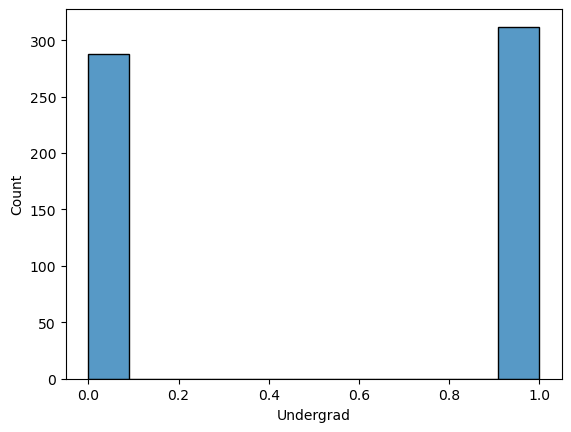

In [12]:
sns.histplot(fraud.Undergrad)

In [13]:
fraud['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [14]:
fraud['Marital.Status']=le.fit_transform(fraud['Marital.Status'])
fraud['Marital.Status']
#here single =2, Divorced=0 , Married=1

0      2
1      0
2      1
3      2
4      1
      ..
595    0
596    0
597    0
598    1
599    0
Name: Marital.Status, Length: 600, dtype: int32

<AxesSubplot:xlabel='Marital.Status', ylabel='Count'>

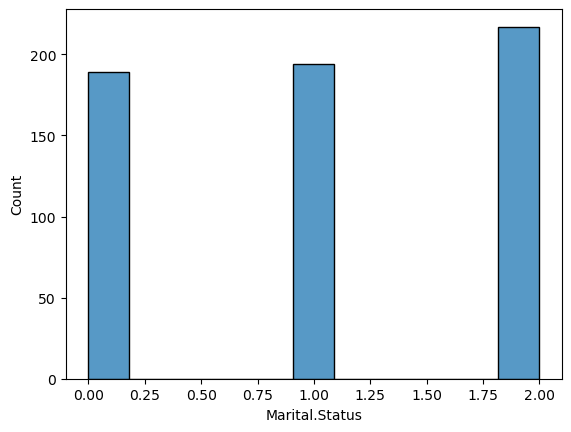

In [15]:
sns.histplot(fraud['Marital.Status'])

In [16]:
fraud['Work.Experience'].unique()

array([10, 18, 30, 15, 28,  0,  8,  3, 12,  4, 19,  6, 14, 16, 13, 29, 25,
       26,  7, 27,  5, 21, 23,  1, 22,  2, 11,  9, 24, 17, 20],
      dtype=int64)

<AxesSubplot:xlabel='Work.Experience', ylabel='Count'>

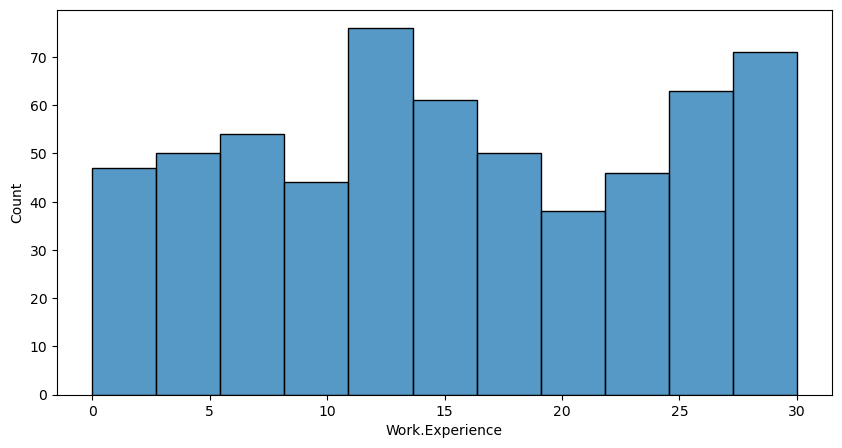

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(fraud['Work.Experience'])

In [18]:
fraud.Urban=le.fit_transform(fraud.Urban)
fraud.Urban

0      1
1      1
2      1
3      1
4      0
      ..
595    1
596    1
597    1
598    0
599    0
Name: Urban, Length: 600, dtype: int32

<AxesSubplot:xlabel='Urban', ylabel='Count'>

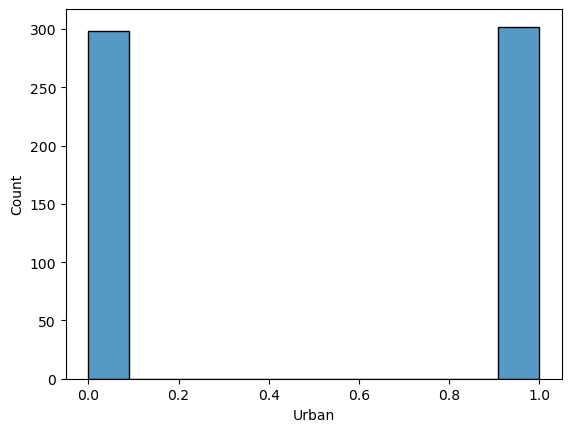

In [19]:
sns.histplot(fraud.Urban)

In [20]:
fraud.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
0,0,2,50047,10,1,1
1,1,0,134075,18,1,1
2,0,1,160205,30,1,1
3,1,2,193264,15,1,1
4,0,1,27533,28,0,1


In [21]:
X=fraud.iloc[:,:5]
Y=fraud.iloc[:,5:]


In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=8)

In [23]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [24]:
#tree.plot_tree(model);
fraud.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban', 'Taxable.Income'],
      dtype='object')

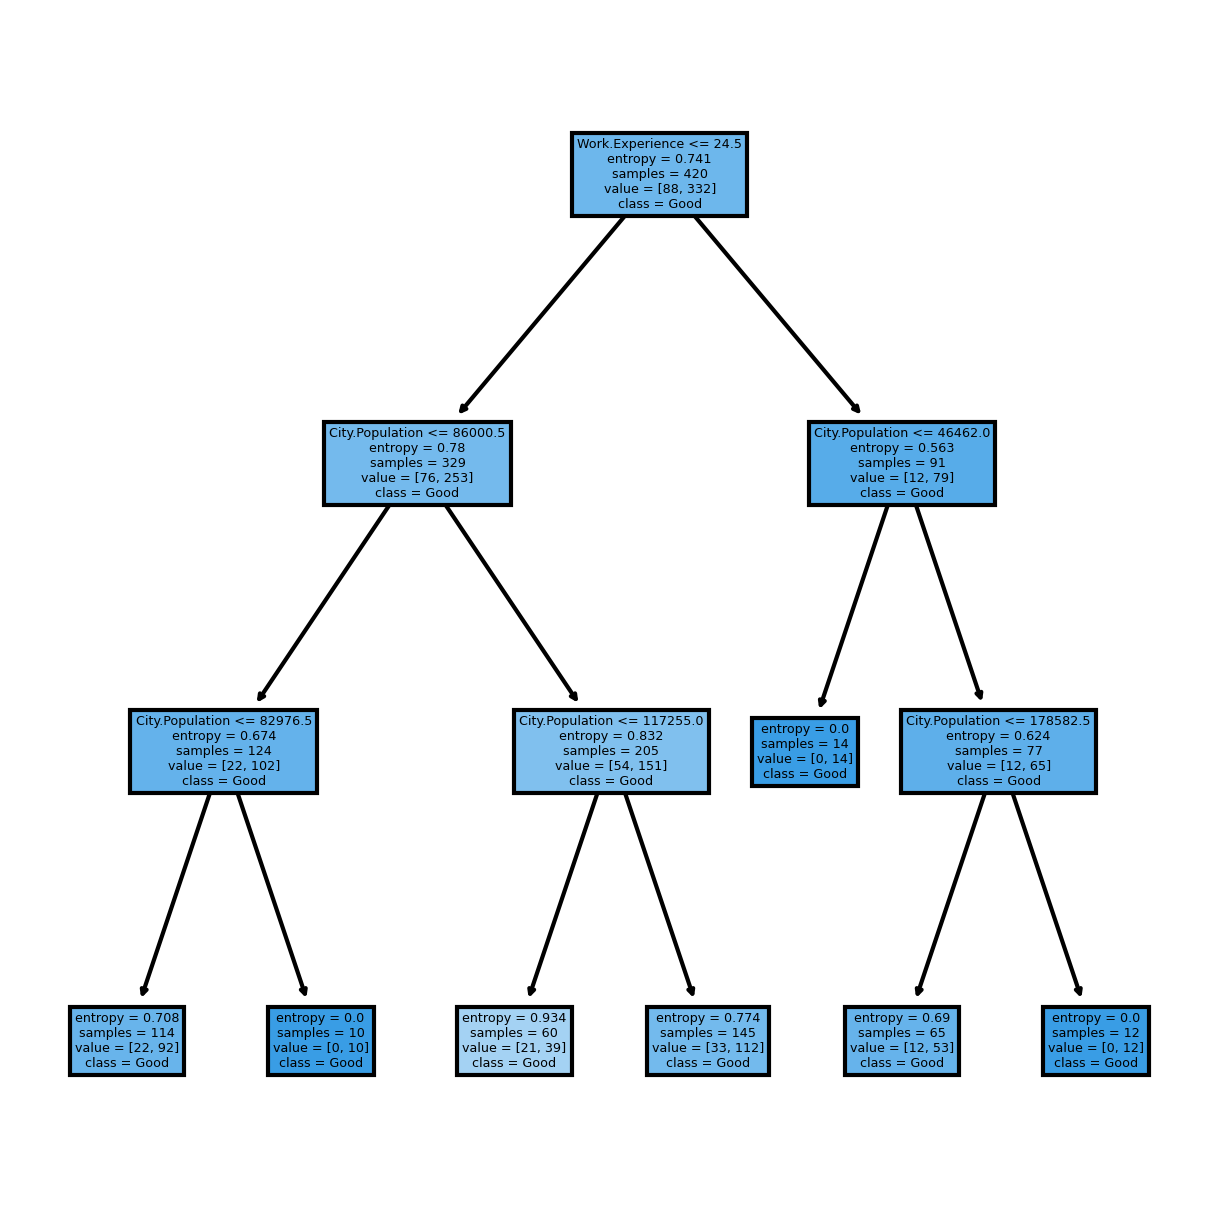

In [25]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=['Risky','Good']
fig, axes=plt.subplots(nrows=1,ncols=1, figsize=(5,5),dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [26]:
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.80      1.00      0.89       144

    accuracy                           0.80       180
   macro avg       0.40      0.50      0.44       180
weighted avg       0.64      0.80      0.71       180



c:\Users\Hi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
accuracy_score(y_test,y_pred)

0.8

In [28]:
model2=DecisionTreeClassifier(criterion='gini',max_depth=3)
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

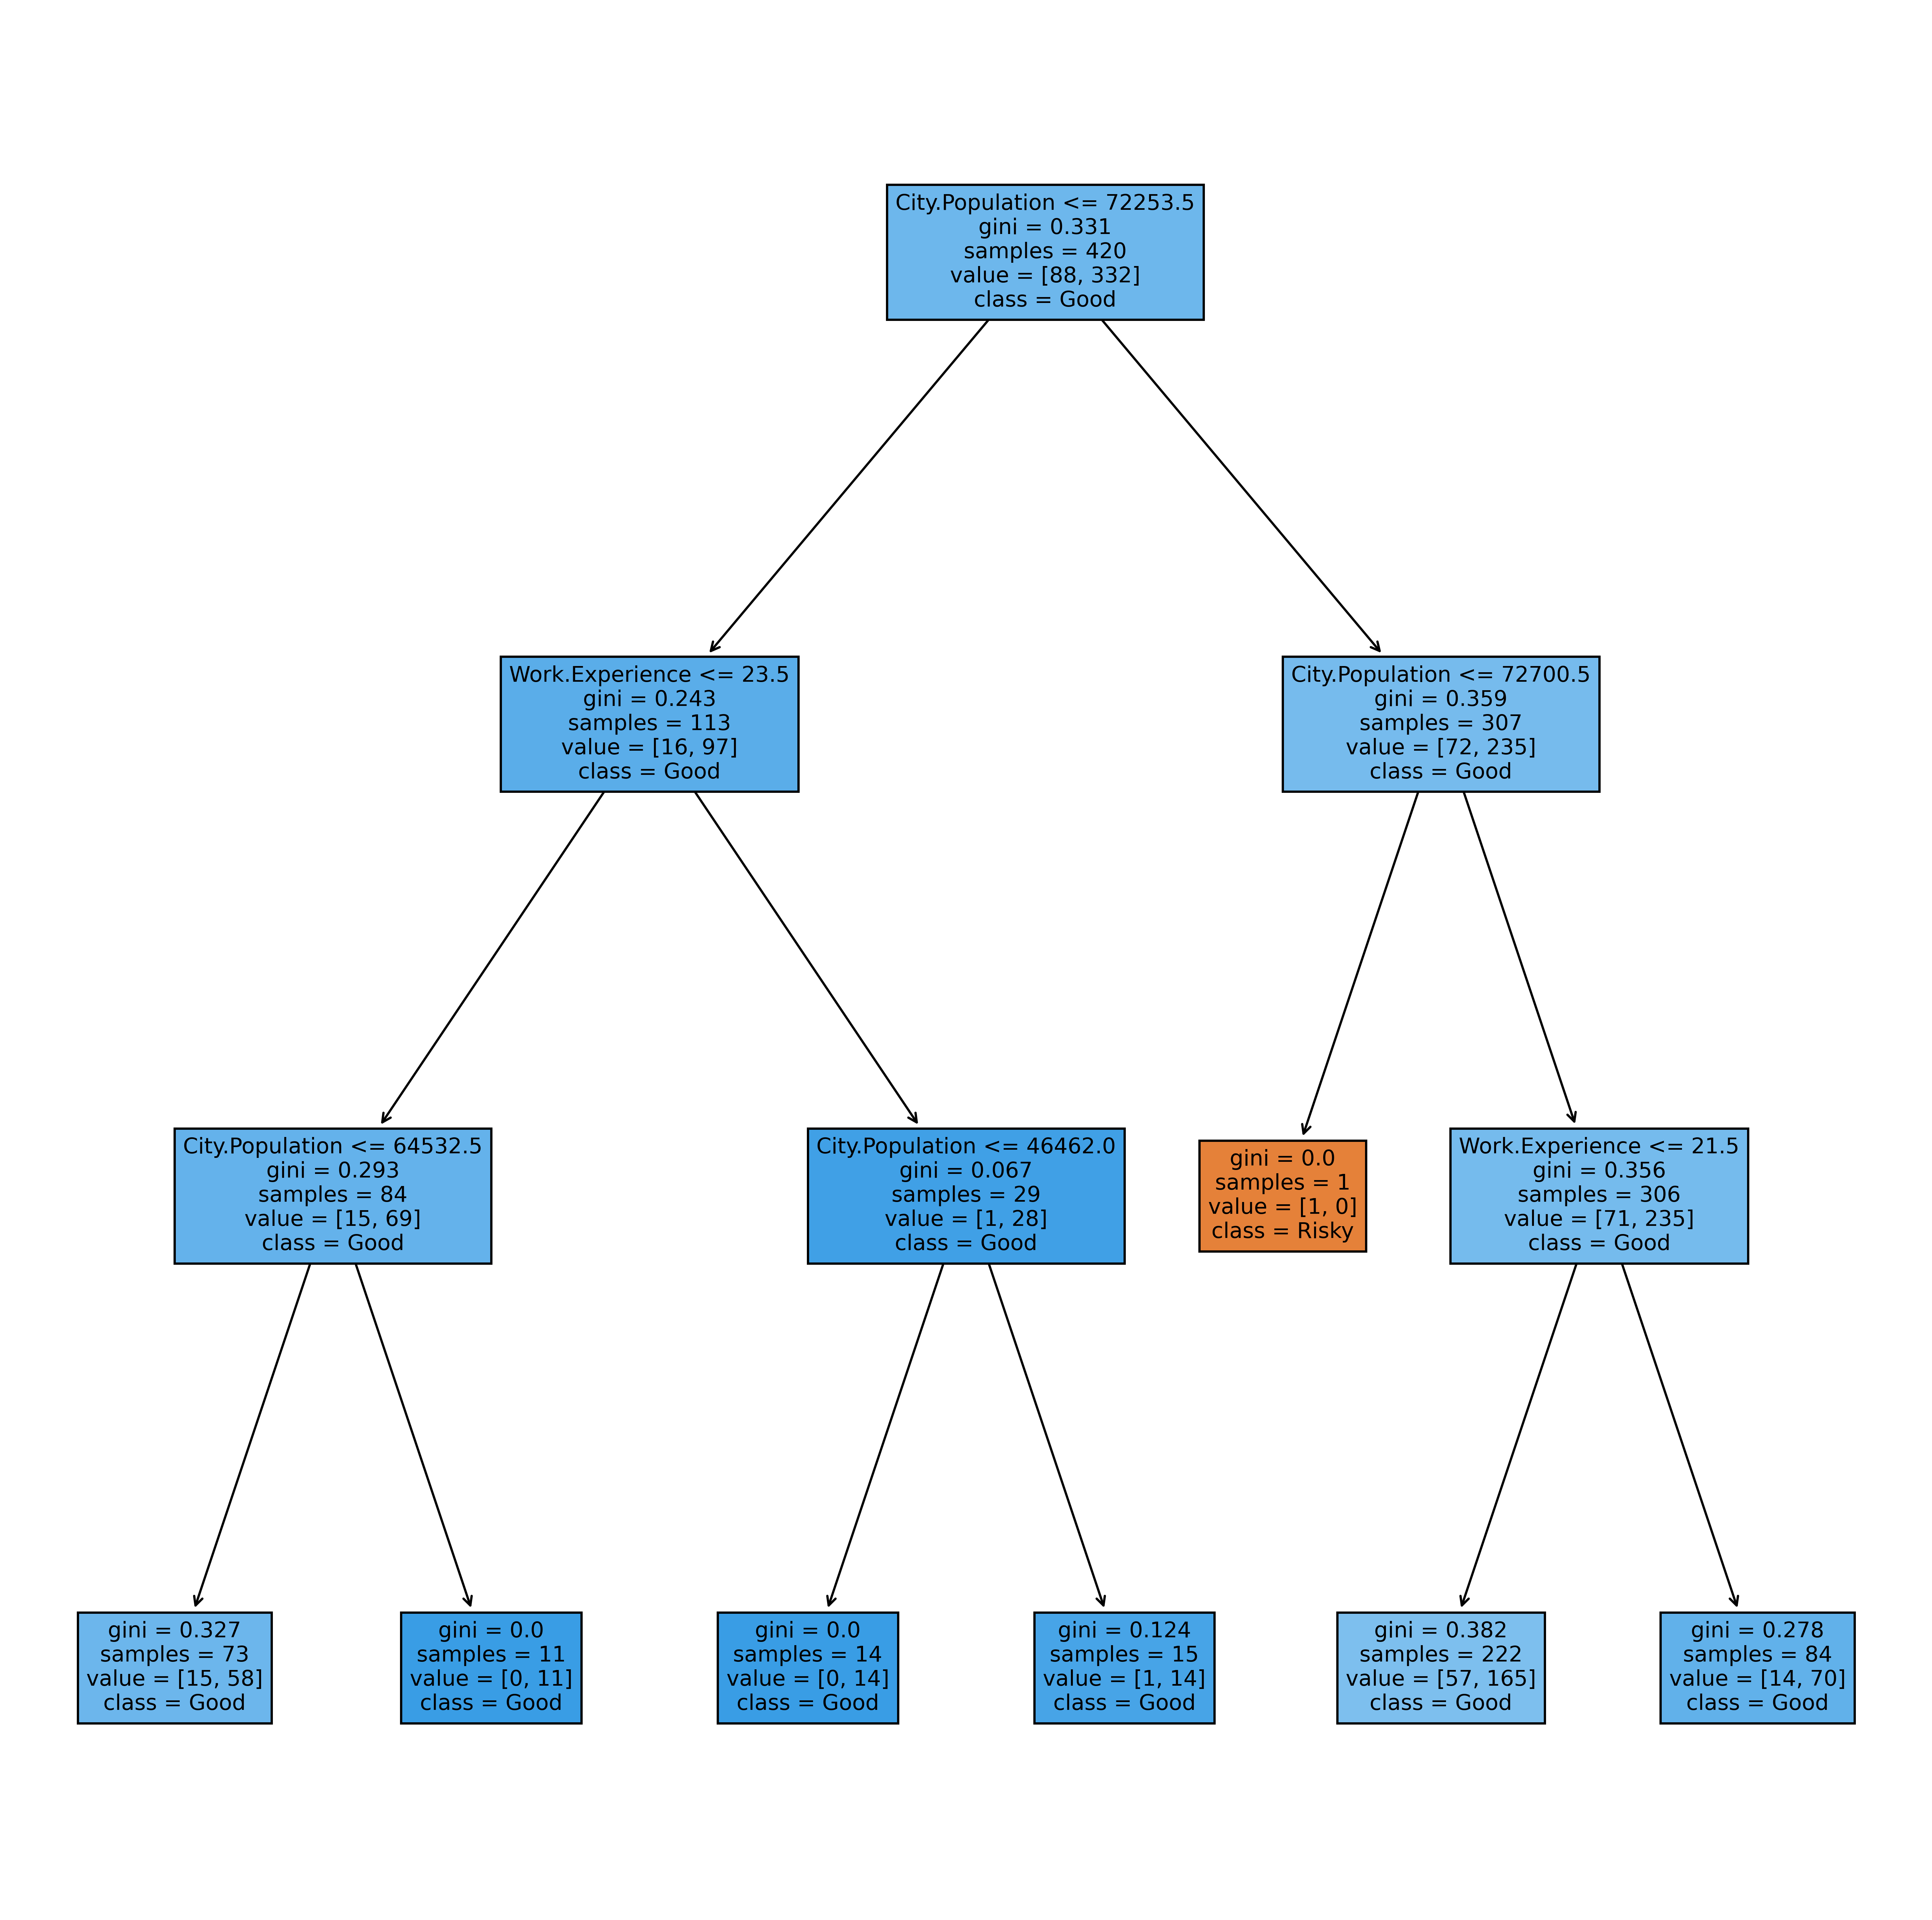

In [29]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,15),dpi=500)
tree.plot_tree(model2,feature_names=fn,class_names=cn,filled=True);

In [30]:
y_pred_CART=model2.predict(x_test)
print(classification_report(y_test,y_pred_CART))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.80      1.00      0.89       144

    accuracy                           0.80       180
   macro avg       0.40      0.50      0.44       180
weighted avg       0.64      0.80      0.71       180



c:\Users\Hi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
accuracy_score(y_test,y_pred_CART)

0.8

In [32]:
model2.score(x_train,y_train)

0.7928571428571428